In [1]:
import pymatgen as mg
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 7676-6C56

 Directory of C:\Users\Owner\Documents\Python Scripts\Otest\O104

06/13/2018  03:00 PM    <DIR>          .
06/13/2018  03:00 PM    <DIR>          ..
06/13/2018  03:00 PM    <DIR>          .ipynb_checkpoints
06/13/2018  02:19 PM           378,017 Analyze vasprun.ipynb
06/13/2018  03:00 PM           565,575 Band Structure of.ipynb
06/12/2018  09:50 PM               274 KPOINTS
06/13/2018  04:01 AM        12,590,826 vasprun.xml
               4 File(s)     13,534,692 bytes
               3 Dir(s)  172,795,867,136 bytes free


In [3]:
run = BSVasprun("vasprun.xml", parse_projected_eigen=True)

In [4]:
bs = run.get_band_structure("KPOINTS")

In [5]:
print("number of bands", bs.nb_bands)

number of bands 60


In [6]:
print("number of kpoints", len(bs.kpoints))

number of kpoints 40


In [7]:
bs.is_metal()

False

In [8]:
bs.is_spin_polarized

False

In [9]:
bs.bands

{<Spin.up: 1>: array([[-16.7071, -16.6956, -16.6641, ..., -16.7869, -16.8461, -16.867 ],
        [-16.0957, -16.1121, -16.1571, ..., -16.1004, -16.0399, -16.018 ],
        [ -4.2416,  -4.2268,  -4.1904, ...,  -4.3341,  -4.3771,  -4.3923],
        ..., 
        [ 26.1188,  26.267 ,  26.8019, ...,  31.0109,  31.6019,  32.1554],
        [ 30.9691,  31.2476,  29.0832, ...,  31.1341,  31.9841,  32.1819],
        [ 32.8389,  31.2904,  29.0832, ...,  31.4064,  32.192 ,  32.3436]])}

In [10]:
bs.bands[Spin.up].shape

(60, 40)

In [11]:
bs.bands[Spin.up][9,:]

array([-1.0963, -1.0721, -1.0089, -0.938 , -0.9092, -0.9351, -0.9869,
       -1.043 , -1.1045, -1.1835, -1.1835, -1.1531, -1.1167, -1.0682,
       -1.0071, -0.9373, -0.8644, -0.7961, -0.7413, -0.7253, -0.7253,
       -0.7317, -0.7496, -0.7755, -0.8053, -0.8351, -0.8627, -0.8869,
       -0.9069, -0.9223, -0.9223, -0.938 , -0.9181, -0.862 , -0.8533,
       -0.9219, -1.007 , -1.0813, -1.1374, -1.1835])

In [12]:
n = 0
for kpoints, e in zip(bs.kpoints, bs.bands[Spin.up][9,:]):
    n += 1
    if n == 11:
        print("...")
    if 10 < n < 190:
        continue
        
    print("kx = %5.3f  ky = %5.3f  kz = %5.3f  eps(k) = %8.4f" % (tuple(kpoints.frac_coords)+ (e,)))

kx = 0.500  ky = 0.500  kz = 0.500  eps(k) =  -1.0963
kx = 0.444  ky = 0.444  kz = 0.444  eps(k) =  -1.0721
kx = 0.389  ky = 0.389  kz = 0.389  eps(k) =  -1.0089
kx = 0.333  ky = 0.333  kz = 0.333  eps(k) =  -0.9380
kx = 0.278  ky = 0.278  kz = 0.278  eps(k) =  -0.9092
kx = 0.222  ky = 0.222  kz = 0.222  eps(k) =  -0.9351
kx = 0.167  ky = 0.167  kz = 0.167  eps(k) =  -0.9869
kx = 0.111  ky = 0.111  kz = 0.111  eps(k) =  -1.0430
kx = 0.056  ky = 0.056  kz = 0.056  eps(k) =  -1.1045
kx = 0.000  ky = 0.000  kz = 0.000  eps(k) =  -1.1835
...


In [13]:
bsplot = BSPlotter(bs)

2.77820312


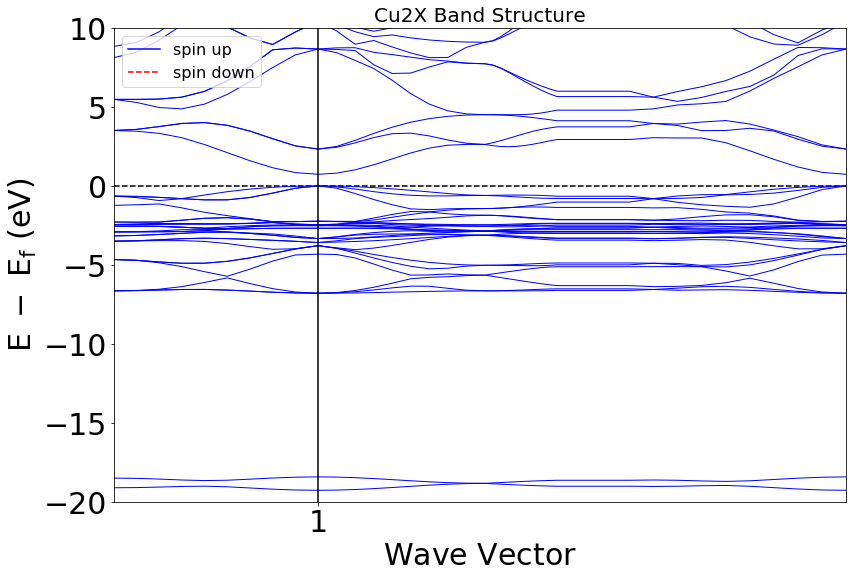

In [14]:
# get the plot
bsplot.get_plot(ylim=(-20, 10), zero_to_efermi=True)
print(bs.efermi)

# add some features
ax = plt.gca()
ax.set_title("Cu2X Band Structure", fontsize=20)
xlim = ax.get_xlim()
ax.hlines(0, xlim[0], xlim[1], linestyles="dashed", color="black")

# add legend
ax.plot((), (), "b-", label="spin up")
ax.plot((), (), "r--", label="spin down")
ax.legend(fontsize=16, loc="upper left")

In [15]:
data = bsplot.bs_plot_data()

In [16]:
data.keys()

dict_keys(['ticks', 'distances', 'energy', 'vbm', 'cbm', 'lattice', 'zero_energy', 'is_metal', 'band_gap'])

In [17]:
ibands = 9 # band number from 0 --> number of bands
spin = str(Spin.up)

for xpath, epath in zip(data["distances"], data["energy"]):
    print(20 * "-")
    for x, bands in zip(xpath, epath[spin][ibands]):
        print("%8.4f %8.4f" % (x, bands))

--------------------
  0.0000  -3.5004
  0.1419  -3.4762
  0.2838  -3.4130
  0.4256  -3.3421
  0.5675  -3.3133
  0.7094  -3.3392
  0.8513  -3.3910
  0.9931  -3.4471
  1.1350  -3.5086
  1.2769  -3.5876
--------------------
  1.2769  -3.5876
  1.3927  -3.5572
  1.5086  -3.5208
  1.6244  -3.4723
  1.7402  -3.4112
  1.8561  -3.3414
  1.9719  -3.2685
  2.0878  -3.2002
  2.2036  -3.1454
  2.3194  -3.1294
  2.3194  -3.1294
  2.3696  -3.1358
  2.4198  -3.1537
  2.4699  -3.1796
  2.5201  -3.2094
  2.5702  -3.2392
  2.6204  -3.2668
  2.6706  -3.2910
  2.7207  -3.3110
  2.7709  -3.3264
  3.2223  -3.3264
  3.3728  -3.3421
  3.5233  -3.3222
  3.6738  -3.2661
  3.8243  -3.2574
  3.9747  -3.3260
  4.1252  -3.4111
  4.2757  -3.4854
  4.4262  -3.5415
  4.5767  -3.5876


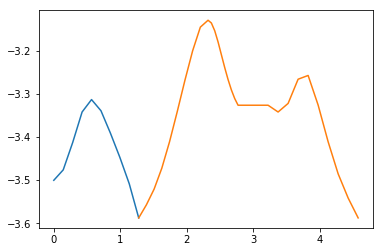

In [18]:
ibands = 9 # band number from 0 --> number of bands
spin = str(Spin.up)

for xpath, epath in zip(data["distances"], data["energy"]):
    plt.plot(xpath, epath[spin][ibands])

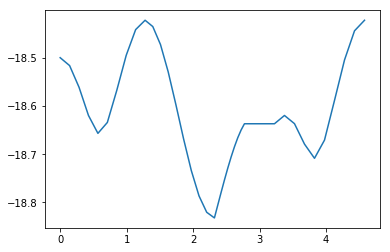

In [19]:
ibands = 1  # band number from 0 --> number of bands
spin = str(Spin.up)

x = list()
y = list()
for xpath, epath in zip(data["distances"], data["energy"]):
    x += xpath
    y += epath[spin][ibands]

plt.plot(x, y)

In [20]:
dosrun = Vasprun("vasprun.xml", parse_dos=True)
dos = dosrun.complete_dos
print(dosrun.efermi)
print(dos.efermi)

2.77820312
2.77820312


C:\Users\Owner\Anaconda3\lib\site-packages\pymatgen\io\vasp\outputs.py:877: UserWarning: No POTCAR file with matching TITEL fields was found in C:\Users\Owner\Documents\Python Scripts\Otest\O104
  " was found in {}".format(os.path.abspath(p)))


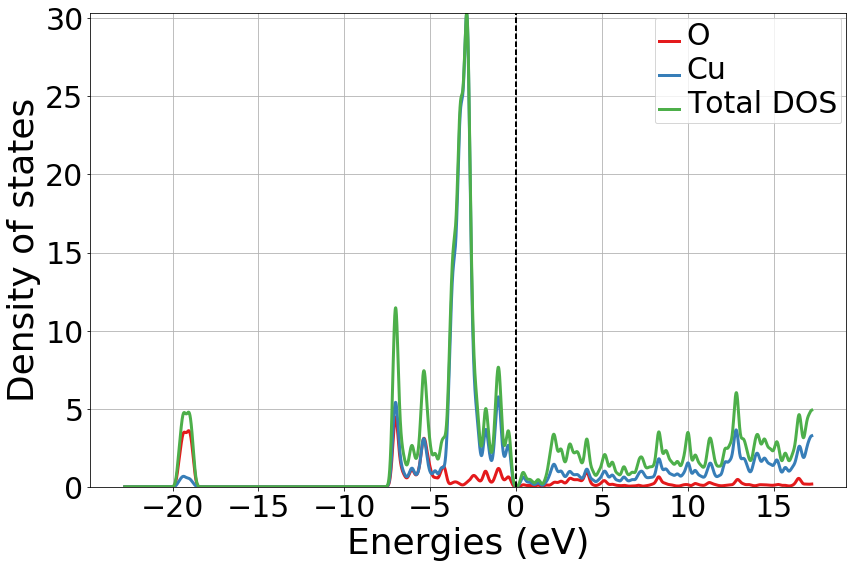

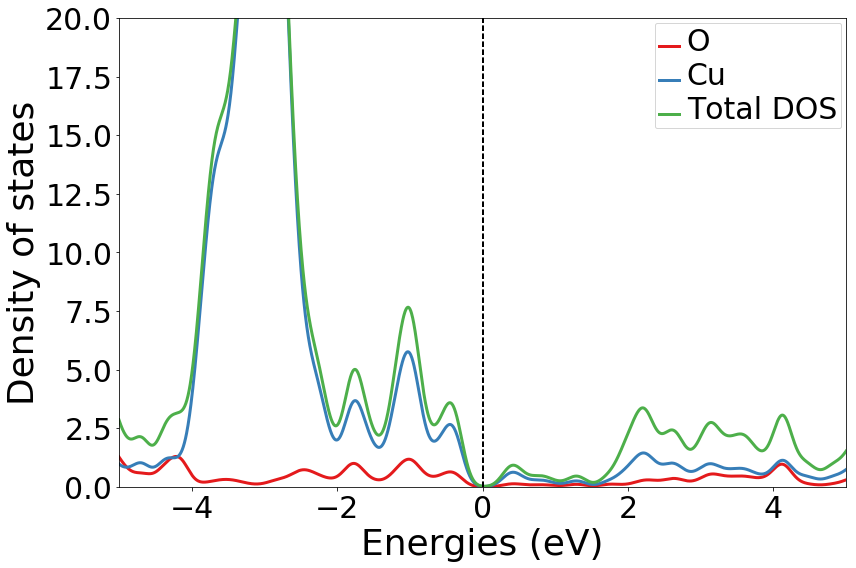

In [21]:
dosplot = DosPlotter(sigma=0.1)
dosplot.add_dos("Total DOS", dos)
dosplot.add_dos_dict(dos.get_element_dos())
plot = dosplot.get_plot()
plt.grid()
dosplot.show(xlim=[-5, 5], ylim=[0, 20])

In [22]:
bs = run.get_band_structure("KPOINTS", efermi=dos.efermi)

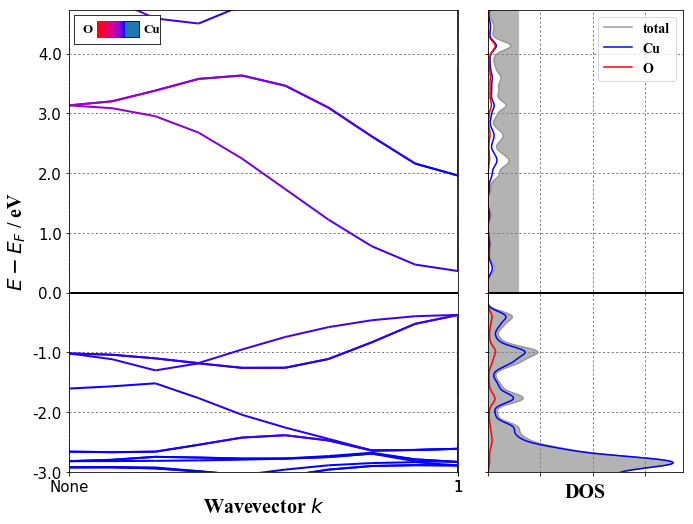

In [23]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements",
    dos_projection="elements",
    vb_energy_range=3,
    egrid_interval=1
)
plt = bsdosplot.get_plot(bs, dos=dos)

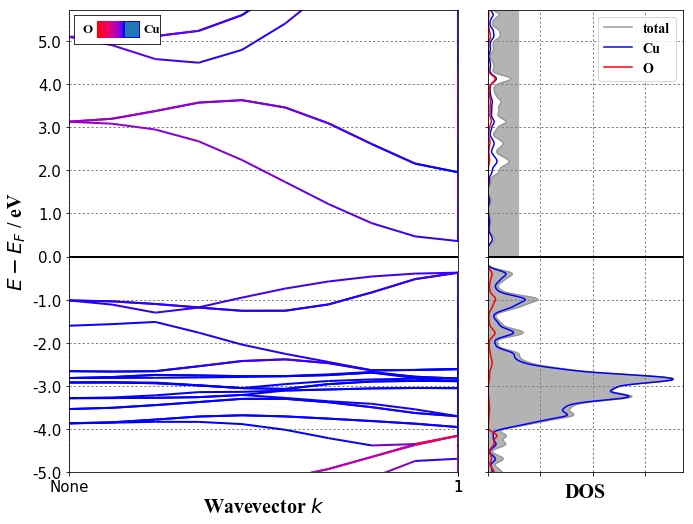

In [24]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements",
    dos_projection="elements",
    vb_energy_range=5,
    cb_energy_range=5,
    egrid_interval=1
)
plt = bsdosplot.get_plot(bs, dos=dos)